In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('/content/Chess.csv')
data['Year'] = data['Date'].str[:4].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Position (in January)  440 non-null    int64 
 1   Name                   440 non-null    object
 2   ELO                    440 non-null    int64 
 3   Date                   440 non-null    object
 4   Age                    440 non-null    int64 
 5   Year                   440 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 20.8+ KB


**Highest Elo**

In [63]:
highest_elo_player = data.loc[data['ELO'].idxmax()]
highest_elo_player

,20
Position (in January),1
Name,Carlsen
ELO,2872
Date,2020 Jan
Age,29
Year,2020


**Top 10 Players With Highest Elo**

In [64]:
top_10_players = data.groupby('Name')['ELO'].max().nlargest(10)
top_10_players

,ELO
Name,
Carlsen,2872
Kasparov,2851
Caruana,2828
Mamedyarov,2817
Ding Liren,2813
Aronian,2812
Kramnik,2811
Anand,2810
Grischuk,2810


**Time Trend of Top 10's Average Elo Each Year**

In [65]:
top_10_avg_elo = (
    data.groupby(['Year', 'Name'])['ELO']
    .max()
    .groupby('Year')
    .nlargest(10)
    .groupby('Year')
    .mean()
)
top_10_avg_elo

,ELO
Year,
2000,2743.7
2001,2751.2
2002,2749.9
2003,2752.0
2004,2749.6
2005,2749.5
2006,2757.8
2007,2753.4
2008,2766.4


**Time Trend for Number of Players Above 2750 Elo**

In [66]:
players_above_2750 = (
    data[data['ELO'] > 2750]
    .groupby('Year')['Name']
    .nunique()
)
players_above_2750

,Name
Year,
2000,4
2001,3
2002,3
2003,3
2004,3
2005,4
2006,5
2007,4
2008,9


**Time Trend of Top 10's Average Age Each Year**

In [67]:
top_10_avg_age = (
    data.groupby(['Year', 'Name'])['ELO']
    .max()
    .groupby('Year')
    .nlargest(10)
    .reset_index(level=0, drop=True)
    .reset_index()
    .merge(data, on=['Year', 'Name'])
    .groupby('Year')['Age']
    .mean()
)
top_10_avg_age

,Age
Year,
2000,27.4
2001,28.2
2002,27.7
2003,28.4
2004,28.5
2005,30.0
2006,31.1
2007,31.0
2008,31.1


**Time Trend for Number of Players Under 25 Years Old in Top 10**

In [68]:
under_25_top_10 = (
    data.groupby(['Year', 'Name'])['ELO']
    .max()
    .groupby('Year')
    .nlargest(10)
    .reset_index(level=0, drop=True)
    .reset_index()
    .merge(data, on=['Year', 'Name'])
)
under_25_top_10_count = under_25_top_10[under_25_top_10['Age'] < 25].groupby('Year')['Name'].nunique()
under_25_top_10_count

,Name
Year,
2000,4
2001,2
2002,3
2003,3
2004,2
2005,1
2006,2
2007,2
2008,1


**Time Trend of Magnus Carlsen's Elo**

In [69]:
carlsen_elo_trend = data[data['Name'] == 'Carlsen'].groupby('Year')['ELO'].mean()
carlsen_elo_trend

,ELO
Year,
2008,2733.0
2009,2776.0
2010,2810.0
2011,2814.0
2012,2835.0
2013,2861.0
2014,2872.0
2015,2862.0
2016,2844.0


**Time Trend of Top 10's Average Elo Each Year**

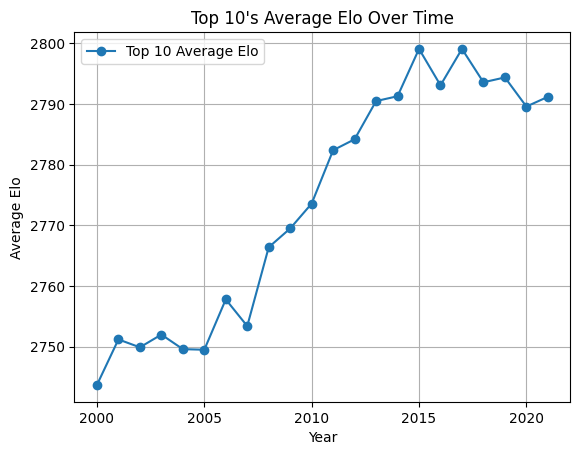

In [74]:
plt.plot(top_10_avg_elo.index, top_10_avg_elo.values, marker='o', label='Top 10 Average Elo')
plt.title("Top 10's Average Elo Over Time")
plt.xlabel("Year")
plt.ylabel("Average Elo")
plt.grid(True)
plt.legend()
plt.show()

**Time Trend for Number of Players Above 2750 Elo**

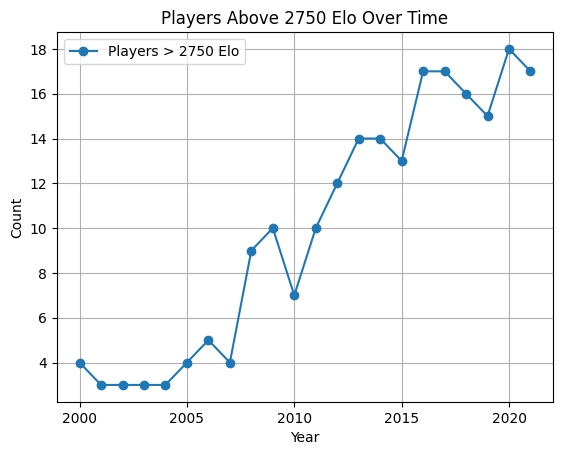

In [75]:
plt.plot(players_above_2750.index, players_above_2750.values,marker ='o', label='Players > 2750 Elo')
plt.title("Players Above 2750 Elo Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()

**Time Trend of Top 10's Average Age Each Year**

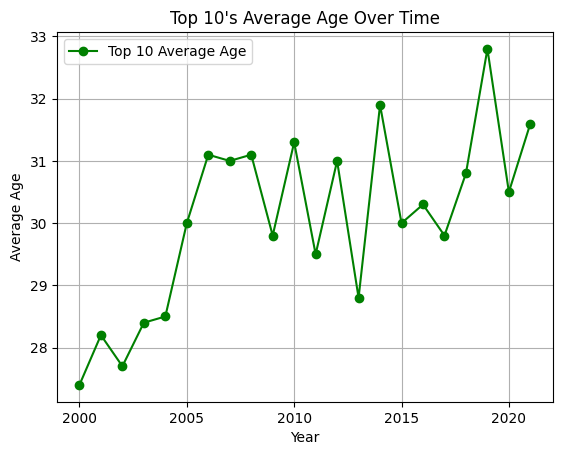

In [76]:
plt.plot(top_10_avg_age.index, top_10_avg_age.values, marker='o', color='g', label='Top 10 Average Age')
plt.title("Top 10's Average Age Over Time")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.grid(True)
plt.legend()
plt.show()

**Time Trend for Number of Players Under 25 in Top 10**

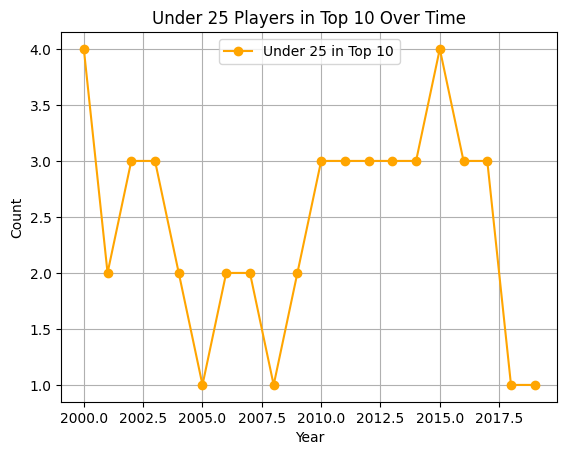

In [77]:
plt.plot(under_25_top_10_count.index, under_25_top_10_count.values, marker='o', color='orange', label='Under 25 in Top 10')
plt.title("Under 25 Players in Top 10 Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()

**Magnus Carlsen's Elo Trend**

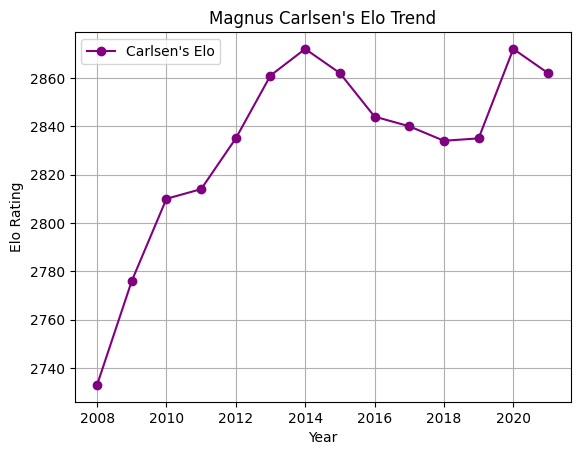

In [50]:
plt.plot(carlsen_elo_trend.index, carlsen_elo_trend.values, marker='o', color='purple', label="Carlsen's Elo")
plt.title("Magnus Carlsen's Elo Trend")
plt.xlabel("Year")
plt.ylabel("Elo Rating")
plt.grid(True)
plt.legend()
plt.show()